<div style="text-align: center"><strong>Biniam Abebe</strong> </div>

<div style="text-align: left"><strong>Datasets:</strong> </div>
<br> credit.xlsx

In [71]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [72]:
#This is a reduced form of a data from kaggle : https://www.kaggle.com/code/jayrdixit/credit-loan-analysis
df=pd.read_excel('credit.xlsx')
df.drop(['Loan ID','Customer ID'],axis=1, inplace=True) #Dropping IDs
medianincome=df['Income'].median()
df.Income=df.Income.fillna(value=medianincome)
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Income,Years_in_job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current_Credit_Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,108790,Short Term,NaN,1188431.0,2.0,Own Home,Take a Trip,19392.35,10.5,10,0,140106,165352,0.0,0
1,Fully Paid,99999999,Short Term,746.0,1512248.0,10.0,Home Mortgage,Debt Consolidation,21297.48,33.0,12,0,390773,1023660,0.0,0
2,Charged Off,397870,Short Term,7410.0,1908930.0,1.0,Rent,Debt Consolidation,27997.64,20.3,10,0,214624,563508,0.0,0
3,Fully Paid,120384,Short Term,738.0,982965.0,2.0,Rent,Debt Consolidation,22935.66,11.2,16,0,180424,282326,0.0,0
4,Fully Paid,137918,Short Term,720.0,557194.0,6.0,Rent,Other,8645.95,17.9,13,0,151164,393338,0.0,0


In [73]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Current Loan Amount,Credit Score,Income,Years_in_job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current_Credit_Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1000.00000,796.00000,1000.00000,962.00000,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000,1000.00000,997.00000,1000.00000
mean,11190490.04700,1115.63191,1360601.85600,6.23077,19020.44039,18.54720,11.41000,0.16500,318906.27900,741809.02400,0.11635,0.02300
std,31078388.69415,1555.12989,823143.50448,3.49978,12415.43574,7.03932,5.06335,0.45605,416829.68179,1406870.61483,0.34783,0.18576
min,22462.00000,586.00000,282701.00000,1.00000,0.00000,4.80000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,187115.50000,708.00000,941735.00000,3.00000,10719.37250,13.90000,8.00000,0.00000,120526.50000,289921.50000,0.00000,0.00000
50%,325930.00000,727.00000,1188431.00000,7.00000,16878.74500,17.20000,11.00000,0.00000,217027.50000,490908.00000,0.00000,0.00000
75%,542173.50000,741.00000,1490654.50000,10.00000,24534.32000,22.00000,14.00000,0.00000,379154.50000,804474.00000,0.00000,0.00000
max,99999999.00000,7500.00000,11937415.00000,10.00000,113343.74000,56.00000,48.00000,5.00000,6506797.00000,26343328.00000,3.00000,3.00000


What is the mean value of the following variables: Income, Monthly Debt, and current balance (You can answer this question by checking either of the 3rd or the 4th blocks. Please do not use "e+" notation. Write the mean explicitly using a thousand separator. One decimal is enough, in case it is needed. .)

In [74]:
Income =  df['Income'].mean()
MonthlyDebt =  df['Monthly Debt'].mean()
CurrentBalance =  df['Current_Credit_Balance'].mean()

# Print outputs with formatting to avoid scientific notation and include thousand separators
print(f"Income: ${Income:,.1f}")
print(f"Monthly Debt: ${MonthlyDebt:,.1f}")
print(f"Current Balance: ${CurrentBalance:,.1f}")



Income: $1,360,601.9
Monthly Debt: $19,020.4
Current Balance: $318,906.3


In [75]:
df=df.dropna()
df.describe()

,Current Loan Amount,Credit Score,Income,Years_in_job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current_Credit_Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,7.680000e+02,768.000000,7.680000e+02,768.000000,768.000000,768.000000,768.000000,768.000000,7.680000e+02,7.680000e+02,768.000000,768.000000
mean,1.408414e+07,1121.460938,1.418974e+06,6.292969,19091.615872,18.284375,11.394531,0.153646,3.297771e+05,7.699559e+05,0.115885,0.020833
std,3.440218e+07,1565.556706,9.258885e+05,3.475577,12258.086266,6.910366,5.035138,0.398612,4.551217e+05,1.574073e+06,0.343853,0.160128
min,2.255000e+04,586.000000,2.827010e+05,1.000000,0.000000,4.800000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2.006895e+05,708.000000,8.639918e+05,3.000000,10749.962500,13.500000,8.000000,0.000000,1.185458e+05,2.838880e+05,0.000000,0.000000
50%,3.318370e+05,727.000000,1.205265e+06,7.000000,17010.415000,17.000000,11.000000,0.000000,2.150990e+05,4.834060e+05,0.000000,0.000000
75%,5.681335e+05,742.000000,1.646972e+06,10.000000,24614.737500,21.900000,14.000000,0.000000,3.860088e+05,8.130485e+05,0.000000,0.000000
max,1.000000e+08,7500.000000,1.193742e+07,10.000000,106836.430000,48.800000,48.000000,2.000000,6.506797e+06,2.634333e+07,2.000000,2.000000


In [76]:
df['Loan_Dummy']=pd.get_dummies(df['Loan Status'],drop_first=True)
df['Term_Dummy']=pd.get_dummies(df['Term'],drop_first=True)
df.drop(['Term','Loan Status','Home Ownership', 'Purpose'],axis=1,inplace=True)
df.head()

,Current Loan Amount,Credit Score,Income,Years_in_job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current_Credit_Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan_Dummy,Term_Dummy
1,99999999,746.0,1512248.0,10.0,21297.48,33.0,12,0,390773,1023660,0.0,0,1,1
2,397870,7410.0,1908930.0,1.0,27997.64,20.3,10,0,214624,563508,0.0,0,0,1
3,120384,738.0,982965.0,2.0,22935.66,11.2,16,0,180424,282326,0.0,0,1,1
4,137918,720.0,557194.0,6.0,8645.95,17.9,13,0,151164,393338,0.0,0,1,1
5,154286,665.0,1167132.0,10.0,18674.15,32.2,7,0,19741,114884,0.0,0,0,1


In [77]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop('Loan_Dummy',axis=1))
scaled_features=scaler.transform(df.drop('Loan_Dummy',axis=1))

In [78]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Current Loan Amount,Credit Score,Income,Years_in_job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current_Credit_Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan_Dummy
0,2.499023,-0.239982,0.100806,1.067289,0.180069,2.130888,0.120327,-0.385703,0.134108,0.161282,-0.33724,-0.130189,0.595397
1,-0.398091,4.019425,0.529519,-1.523896,0.727016,0.291871,-0.277140,-0.385703,-0.253181,-0.131241,-0.33724,-0.130189,0.595397
2,-0.406162,-0.245095,-0.471216,-1.235986,0.313797,-1.025849,0.915262,-0.385703,-0.328375,-0.309991,-0.33724,-0.130189,0.595397
3,-0.405652,-0.256600,-0.931367,-0.084348,-0.852700,-0.055659,0.319061,-0.385703,-0.392707,-0.239419,-0.33724,-0.130189,0.595397
4,-0.405176,-0.291755,-0.272178,1.067289,-0.034079,2.015044,-0.873341,-0.385703,-0.681660,-0.416435,-0.33724,-0.130189,0.595397


# Train Test Split

In [79]:
X_train,X_test,y_train,y_test=train_test_split(df,df['Loan_Dummy'],test_size=0.30, random_state=0)

# KNN Algorithm

In [80]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [81]:
pred=knn.predict(X_test)

In [82]:
print('3. What does "k" stand for in this kNN example?')
print("""In the kNN example, "k" stands for the number of nearest neighbors considered when making a prediction. 
The classifier will look at the 'k' closest points in the feature space to the new point and predict the class based on these neighboring points.""")
   


3. What does "k" stand for in this kNN example?
In the kNN example, "k" stands for the number of nearest neighbors considered when making a prediction. 
The classifier will look at the 'k' closest points in the feature space to the new point and predict the class based on these neighboring points.


In [83]:
print("""4. How can we choose the best "k" in this example?""")
print("""To choose the best "k" in kNN, we perform model cross-validation. 
By varying "k" and observing the model's performance we can determine the best "k" that have minimizes error or maximizes accuracy.""")

4. How can we choose the best "k" in this example?
To choose the best "k" in kNN, we perform model cross-validation. 
By varying "k" and observing the model's performance we can determine the best "k" that have minimizes error or maximizes accuracy.


In [84]:
print('#5. What is the accuracy score when k=3? What does it mean?')

accuracy = accuracy_score(y_test, pred)
# Print the accuracy
print(f'Accuracy when k=3: {accuracy * 100:.2f}%')
print('Accracy of 72.73% indicates how well the model performs in correctly predicting the labels for the test data.')

#5. What is the accuracy score when k=3? What does it mean?
Accuracy when k=3: 72.73%
Accracy of 72.73% indicates how well the model performs in correctly predicting the labels for the test data.


# Prediction and Evaluation

In [85]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[  6  47]
 [ 16 162]]


In [86]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.27      0.11      0.16        53
           1       0.78      0.91      0.84       178

    accuracy                           0.73       231
   macro avg       0.52      0.51      0.50       231
weighted avg       0.66      0.73      0.68       231



In [87]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Errors')

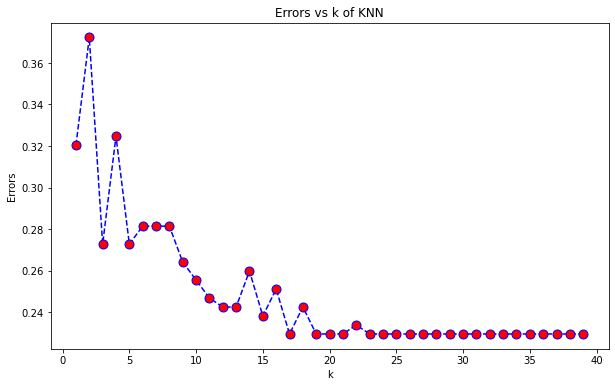

In [88]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=9)
plt.title( 'Errors vs k of KNN')
plt.xlabel('k')
plt.ylabel('Errors')

In [89]:
knn=KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.77      0.97      0.86       178

    accuracy                           0.75       231
   macro avg       0.38      0.49      0.43       231
weighted avg       0.59      0.75      0.66       231



In [1]:
print('6. What happens to the accuracy score when we pick k=16?')
print("""When K= 16,  the accuracy score is approximately 74.89%. As k increases to 16, there is a slight improvement in accuracy,
indicating that the model is slightly more effective at this higher value of
k in predicting the class correctly.However, we need to be mindful that we are not overfitting and completely ignoring the information in the predictors.""")

6. What happens to the accuracy score when we pick k=16?
When K= 16,  the accuracy score is approximately 74.89%. As k increases to 16, there is a slight improvement in accuracy,
indicating that the model is slightly more effective at this higher value of
k in predicting the class correctly.However, we need to be mindful that we are not overfitting and completely ignoring the information in the predictors.
